# Analysis of Gspacer on HWMCC20 Rules

- Start: Tuesday, November 3, 2020, 11:43:44 AM
- End: Tuesday, November 3, 2020, 10:17:58 PM
- Duration: 10 hours, 34 minutes, and 14 seconds
- Number of benchmarks: 639
- Timeout: 900 seconds
- Branch: `gpsacer`
- Arguments: `-st -v:1 -T:900 fp.xform.slice=true fp.xform.inline_linear=true fp.xform.inline_eager=true fp.xform.tail_simplifier_pve=true fp.engine=spacer fp.print_statistics=true fp.spacer.elim_aux=true fp.spacer.reach_dnf=true fp.spacer.iuc=1 fp.spacer.iuc.arith=1 fp.validate=true fp.spacer.ground_pobs=true fp.spacer.mbqi=false fp.spacer.iuc.print_farkas_stats=false fp.spacer.iuc.old_hyp_reducer=false fp.spacer.ctp=true fp.spacer.weak_abs=true fp.spacer.native_mbp=true fp.spacer.conjecture=true fp.spacer.global=true fp.spacer.concretize=true fp.spacer.use_sage=false fp.spacer.use_iuc=true`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from typing import Dict, List, Tuple


# noinspection PyUnresolvedReferences
pd.set_option('display.max_rows', None)
# noinspection PyUnresolvedReferences
pd.set_option('display.max_colwidth', None)

sns.set(style='ticks', palette='Set2')
# noinspection PyUnresolvedReferences
plt.rcParams['figure.figsize'] = (10, 10)

In [2]:
out_dir: str = '../../out/gspacer.hwmcc20-rules.lilla-my.03_11_2020-t11-43-43'

df: pd.DataFrame = pd.read_csv('out.csv')

df['status'].fillna(value='(no status)', inplace=True)

timeout = 900
df['time'].fillna(value=timeout, inplace=True)
df.loc[df['status'] == 'unknown', 'time'] = timeout

# show a snapshot of data for visual validation
df.head()

,index,SPACER_cex_depth,SPACER_cluster_out_of_gas,SPACER_conj,SPACER_conj_failed,SPACER_conj_success,SPACER_inductive_level,SPACER_max_depth,SPACER_max_query_lvl,SPACER_non_local_gen,...,time_spacer_init_rules_pt_init,time_spacer_mbp,time_spacer_solve,time_spacer_solve_propagate,time_spacer_solve_reach,time_spacer_solve_reach_children,time_spacer_solve_reach_cluster,time_spacer_solve_reach_gen_bool_ind,time_spacer_solve_reach_gen_global,time_spacer_solve_reach_is_reach
0,array-VexRiscv-regch0-15-p0.smt2,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,NaN,...,0.06,13.96,124.64,0.86,123.75,15.31,0.69,86.06,NaN,NaN
1,array-VexRiscv-regch0-15-p1.smt2,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,NaN,...,0.06,3.25,34.20,3.00,31.18,3.83,0.04,20.25,NaN,NaN
2,array-VexRiscv-regch0-20-p0.smt2,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,NaN,...,0.06,15.49,153.23,8.65,144.55,16.77,0.31,103.92,NaN,NaN
3,array-arbitrated_fifos_n2d8w8.smt2,NaN,21.0,2.0,2.0,NaN,NaN,20.0,19.0,2.0,...,0.00,33.13,638.42,195.09,443.25,29.43,7.32,290.13,4.88,1.59
4,array-array_swap.smt2,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,...,NaN,NaN,0.01,0.00,0.00,NaN,NaN,NaN,NaN,NaN


In [3]:
# quick overview of solved/unsolved instances
df[['status', 'index']].groupby('status').count()

,index
status,
(no status),6
sat,22
timeout,301
unknown,34
unsat,276


In [4]:
df.query('status == "(no status)"')[['index', 'status']]

,index,status
92,array-dblclockfft_butterfly_ck3_r0-p051.smt2,(no status)
105,array-dblclockfft_butterfly_ck3_r1-p049.smt2,(no status)
135,array-marlann_compute_fail1-p0.smt2,(no status)
138,array-marlann_compute_fail2-p1.smt2,(no status)
139,array-marlann_compute_fail2-p2.smt2,(no status)
634,bv-zipversa_composecrc_prf-p10.smt2,(no status)


In [5]:
# Find unknown results. Usually means that something went wrong, not just timeout.
unknown_df: pd.DataFrame = df.query('status == "unknown"')[['index', 'status']]

def get_error(index: str) -> str:
    with open(os.path.join(out_dir, index)) as f:
        return f.readline().strip()

unknown_df['error'] = unknown_df['index'].apply(get_error)
unknown_df.sort_values('error').head()

,index,status,error
2,array-VexRiscv-regch0-20-p0.smt2,unknown,"(error ""query failed: Argument #b00011 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 32) (_ BitVec 32)) (_ BitVec 32))"")"
173,array-zipcpu-zipmmu-p28.smt2,unknown,"(error ""query failed: Argument #b11 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 20) (_ BitVec 20)) (_ BitVec 20))"")"
172,array-zipcpu-zipmmu-p26.smt2,unknown,"(error ""query failed: Argument #b11 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 20) (_ BitVec 20)) (_ BitVec 20))"")"
0,array-VexRiscv-regch0-15-p0.smt2,unknown,"(error ""query failed: Argument #b11111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 32) (_ BitVec 32)) (_ BitVec 32))"")"
1,array-VexRiscv-regch0-15-p1.smt2,unknown,"(error ""query failed: Argument #b11111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 32) (_ BitVec 32)) (_ BitVec 32))"")"


In [6]:
unknown_df.groupby('error')[['index']].agg(['first', 'count'])

index  \
                                                                                                                                                                                               first   
error                                                                                                                                                                                                  
(error "query failed: Argument #b00011 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 32) (_ BitVec 32)) (_ BitVec 32))")                   array-VexRiscv-regch0-20-p0.smt2   
(error "query failed: Argument #b11 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 20) (_ BitVec 20)) (_ BitVec 20))")                          array-zipcpu-zipmmu-p26.smt2   
(error "query failed: Argument #b11111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 32) (_ BitVec 32)) (_ BitVec 32))")                   array-VexRiscv-regch0-15-p0.smt2   
(error "query failed: Argument #b1111111111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 32) (_ BitVec 32)) (_ BitVec 32))")                         array-array_swap.smt2   
(error "query failed: operator is applied to arguments of the wrong sort")                                                                              array-dblclockfft_butterfly_ck3_r2-p042.smt2   
(error "query failed: rule validation failed when checking: (and (not false))")                                                                                           bv-picorv32-pcregs-p0.smt2   
(error "query failed: rule validation failed when checking: (exists ((x!1 Bool)                                                                            array-dblclockfft_butterfly_ck1-p063.smt2   

                                                                                                                                                              
                                                                                                                                                       count  
error                                                                                                                                                         
(error "query failed: Argument #b00011 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 32) (_ BitVec 32)) (_ BitVec 32))")          1  
(error "query failed: Argument #b11 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 20) (_ BitVec 20)) (_ BitVec 20))")             2  
(error "query failed: Argument #b11111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 32) (_ BitVec 32)) (_ BitVec 32))")          3  
(error "query failed: Argument #b1111111111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 32) (_ BitVec 32)) (_ BitVec 32))")     2  
(error "query failed: operator is applied to arguments of the wrong sort")                                                                                 1  
(error "query failed: rule validation failed when checking: (and (not false))")                                                                            2  
(error "query failed: rule validation failed when checking: (exists ((x!1 Bool)                                                                           23

In [7]:
df_ratio: pd.DataFrame = df.assign(ratio=df['time_pool_solver_smt_total'] / df['time_spacer_solve'])
df_ratio[(df_ratio['ratio'] < 0.5) & (df_ratio['time_spacer_solve'] > 10)]\
    [['index', 'time_pool_solver_smt_total', 'time_spacer_solve', 'ratio']]\
    .sort_values('ratio', ascending=True)

,index,time_pool_solver_smt_total,time_spacer_solve,ratio
407,bv-dspfilters_fastfir_second-p04.smt2,1.57,810.30,0.001938
11,array-dblclockfft_butterfly_ck1-p068.smt2,50.92,740.80,0.068737
394,bv-cal97.smt2,139.10,862.77,0.161225
17,array-dblclockfft_butterfly_ck1-p117.smt2,79.92,465.06,0.171849
420,bv-dspfilters_fastfir_second-p26.smt2,153.81,888.76,0.173061
43,array-dblclockfft_butterfly_ck1-p343.smt2,12.36,60.73,0.203524
34,array-dblclockfft_butterfly_ck1-p269.smt2,13.38,56.58,0.236479
419,bv-dspfilters_fastfir_second-p25.smt2,80.69,337.71,0.238933
45,array-dblclockfft_butterfly_ck1-p348.smt2,3.76,15.28,0.246073
21,array-dblclockfft_butterfly_ck1-p167.smt2,15.86,64.21,0.247002


In [8]:
max_expand_time_line_no_memo: Dict[str, int] = {}
def get_max_expand_time(index: str) -> float:
    max_expand_time: float = 0
    max_expand_line: int = 0
    multi_line: bool = False
    with open(os.path.join(out_dir, index + '.err')) as f:
        for i, line in enumerate(f):
            tokens: List[str] = line.split()
            if len(tokens) > 2:
                first: str = tokens[0]
                second_last: str = tokens[-2]
                last: str = tokens[-1]
                if multi_line:
                    if len(second_last) == 1 and not last.endswith('.') and last.replace('.', '', 1).isdigit():
                        multi_line = False
                        expand_time: float = float(last)
                        if expand_time > max_expand_time:
                            max_expand_time = expand_time
                            max_expand_line = i + 1
                elif first == 'expand:':
                    if len(second_last) == 1 and not last.endswith('.') and last.replace('.', '', 1).isdigit():
                        expand_time: float = float(last)
                        if expand_time > max_expand_time:
                            max_expand_time = expand_time
                            max_expand_line = i + 1
                    else:
                        multi_line = True
    max_expand_time_line_no_memo[index] = max_expand_line
    return max_expand_time

def get_max_expand_time_line_no(index: str) -> int:
    return max_expand_time_line_no_memo[index]

df_max_expand_time: pd.DataFrame = df.assign(max_expand_time=df['index'].apply(get_max_expand_time),
                                             max_expand_time_line_no=df['index'].apply(get_max_expand_time_line_no))
df_max_expand_time[df_max_expand_time['max_expand_time'] > 5]\
    [['index', 'max_expand_time', 'max_expand_time_line_no']]\
    .sort_values('max_expand_time', ascending=False)

,index,max_expand_time,max_expand_time_line_no
407,bv-dspfilters_fastfir_second-p04.smt2,808.54,3099
394,bv-cal97.smt2,649.24,1323
371,bv-cal176.smt2,467.60,4910
151,array-picorv32_mutAY_mem-p8.smt2,414.41,11154
418,bv-dspfilters_fastfir_second-p22.smt2,305.79,23328
11,array-dblclockfft_butterfly_ck1-p068.smt2,280.71,12270
411,bv-dspfilters_fastfir_second-p09.smt2,271.81,10104
333,bv-arbitrated_top_n4_w128_d16_e0.smt2,249.76,13419
17,array-dblclockfft_butterfly_ck1-p117.smt2,237.35,10253
412,bv-dspfilters_fastfir_second-p10.smt2,216.83,24417


## HWMCC20 modelcheckers

In [9]:
pd.read_csv('http://fmv.jku.at/hwmcc20/hwmcc20-combined-all.txt', delim_whitespace=True)

,cnt,ok,sat,uns,dis,fld,to,mo,unk,real,time,space,max,best,uniq
avr,639,547,66,481,0,92,0,0,92,71456,1049649,2282407,49141,100,23
nuxmv,639,500,50,450,0,139,139,0,0,99664,339693,505974,6898,12,2
pono,639,386,58,328,0,253,219,22,12,63789,288937,596666,77761,38,1
cosa2,639,373,58,315,0,266,252,1,13,136153,537672,585138,14623,17,0
btormc,639,333,59,274,0,306,305,0,1,53822,53797,47550,2565,208,2
abc,324,262,56,206,0,62,62,0,0,36505,429078,344728,31293,29,1
abc17,324,262,55,207,0,62,62,0,0,39465,470045,352773,31820,10,1
pdtrav,324,245,45,200,0,79,76,0,3,74891,429930,713508,30090,8,2
avy,324,236,40,196,0,88,88,0,0,44055,437528,426064,14949,25,0
nmtip,324,210,17,193,26,88,88,0,0,24949,24933,17119,3117,142,13


In [10]:
# The values of the result column are unknown if all model checkers
# gives unknown, or if the number of model checkers that says sat
# and the number of those that say unsat tie. Otherwise, the values
# are sat or unsat based on the majority of the model checkers.
hwmcc20_results: pd.DataFrame = pd.read_csv('../hwmcc20-results.csv')
hwmcc20_results['index'] = hwmcc20_results['index'].apply(lambda idx: idx + '.smt2')
hwmcc20_results.head()

,index,result,sat_count,uns_count,unk_count,low_bound,high_bound,avg_bound,low_real,high_real,avg_real,low_time,high_timeavg_time,low_mem,high_mem,avg_mem,avg_time,high_time
0,array-VexRiscv-regch0-15-p0.smt2,unsat,0,5,0,-1,-1,-1.0,9.40,2857.39,586.858,9.30,NaN,82.0,2633.0,1112.0,1779.746,8570.64
1,array-VexRiscv-regch0-15-p1.smt2,unsat,0,5,0,-1,-1,-1.0,9.59,3105.02,641.160,9.46,NaN,79.0,4350.0,1388.4,1355.362,6296.49
2,array-VexRiscv-regch0-20-p0.smt2,unsat,0,4,0,-1,-1,-1.0,228.44,3600.10,1017.224,228.36,NaN,209.0,10376.0,3061.4,3822.140,8203.90
3,array-arbitrated_fifos_n2d8w8.smt2,unknown,0,0,2,-1,-1,-1.0,0.74,3600.10,2874.864,1.46,NaN,82.0,4803.0,1544.2,10024.040,28426.36
4,array-array_swap.smt2,unknown,0,0,2,-1,-1,-1.0,0.42,3600.10,2875.386,0.09,NaN,31.0,24699.0,9013.2,13639.468,46507.75


In [11]:
hwmcc20_results[['result', 'index']].groupby(['result']).count()

,index
result,
sat,84
unknown,43
unsat,512


## Compare Gspacer and HWMCC20 modelcheckers

In [12]:
m: pd.DataFrame = pd.merge(df, hwmcc20_results, on='index')
m.head()

,index,SPACER_cex_depth,SPACER_cluster_out_of_gas,SPACER_conj,SPACER_conj_failed,SPACER_conj_success,SPACER_inductive_level,SPACER_max_depth,SPACER_max_query_lvl,SPACER_non_local_gen,...,low_real,high_real,avg_real,low_time,high_timeavg_time,low_mem,high_mem,avg_mem,avg_time,high_time
0,array-VexRiscv-regch0-15-p0.smt2,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,NaN,...,9.40,2857.39,586.858,9.30,NaN,82.0,2633.0,1112.0,1779.746,8570.64
1,array-VexRiscv-regch0-15-p1.smt2,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,NaN,...,9.59,3105.02,641.160,9.46,NaN,79.0,4350.0,1388.4,1355.362,6296.49
2,array-VexRiscv-regch0-20-p0.smt2,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,NaN,...,228.44,3600.10,1017.224,228.36,NaN,209.0,10376.0,3061.4,3822.140,8203.90
3,array-arbitrated_fifos_n2d8w8.smt2,NaN,21.0,2.0,2.0,NaN,NaN,20.0,19.0,2.0,...,0.74,3600.10,2874.864,1.46,NaN,82.0,4803.0,1544.2,10024.040,28426.36
4,array-array_swap.smt2,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,...,0.42,3600.10,2875.386,0.09,NaN,31.0,24699.0,9013.2,13639.468,46507.75


In [13]:
m[['status', 'index', 'result']].groupby(['status', 'result']).count()

index
status      result        
(no status) sat          3
            unsat        3
sat         sat         12
            unsat       10
timeout     sat         69
            unknown     39
            unsat      193
unknown     unknown      3
            unsat       31
unsat       unknown      1
            unsat      275

In [14]:
# {sat|uns|unk}_count: The number of model checkers
#                      that gives {sat|unsat|unknown}
query_columns: List[str] = ['index', 'status', 'result', 'time', 'memory',
                            'sat_count', 'uns_count', 'unk_count']
m.query('status == "sat" & result == "unsat"')[query_columns].sort_values('time')

,index,status,result,time,memory,sat_count,uns_count,unk_count
443,bv-miim.smt2,sat,unsat,0.03,8.77,0,9,1
582,bv-stack-p2.smt2,sat,unsat,0.04,10.47,0,10,1
585,bv-vcegar_arrays_itc99_b12_p2.smt2,sat,unsat,0.04,9.92,0,1,1
559,bv-rast-p11.smt2,sat,unsat,0.06,10.53,0,10,1
424,bv-elevator.4.prop1-func-interl.smt2,sat,unsat,0.07,11.17,0,9,1
554,bv-rast-p00.smt2,sat,unsat,0.07,11.12,0,6,1
560,bv-rast-p14.smt2,sat,unsat,0.11,15.64,0,2,1
561,bv-rast-p16.smt2,sat,unsat,0.12,15.64,0,4,1
562,bv-rast-p17.smt2,sat,unsat,0.14,14.16,0,1,1
444,bv-msmie.3.prop1-func-interl.smt2,sat,unsat,0.35,32.25,0,5,1


For `bv-vcegar_arrays_itc99_b12_p2.smt2` and `bv-rast-p17.smt2`, only nmtip says unsat.

In [15]:
m.query('status == "unsat" & result == "sat"')[query_columns].sort_values('time')

,index,status,result,time,memory,sat_count,uns_count,unk_count


In [16]:
m.query('status == "sat" & result == "unknown"')[query_columns].sort_values('time')

,index,status,result,time,memory,sat_count,uns_count,unk_count


In [17]:
m.query('status == "unsat" & result == "unknown"')[query_columns].sort_values('time')

,index,status,result,time,memory,sat_count,uns_count,unk_count
168,array-simple-stack-pred1.smt2,unsat,unknown,0.1,10.29,0,0,1


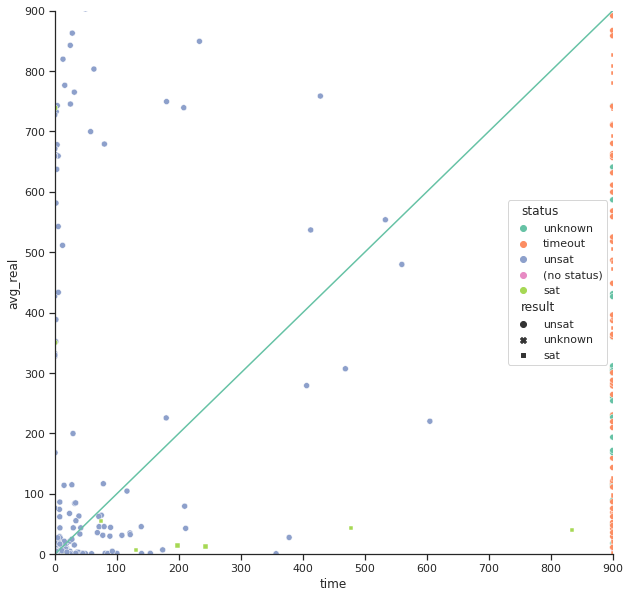

In [18]:
plt.xlim(0, timeout)
plt.ylim(0, timeout)
g = sns.scatterplot(x='time', y='avg_real', hue='status', style='result', data=m)
sns.despine()
x = np.linspace(0, timeout, 2)
g.plot(x, x)

## BV

In [19]:
df_bv: pd.DataFrame = df[df['index'].str.startswith('bv-')]
df_bv.head()

,index,SPACER_cex_depth,SPACER_cluster_out_of_gas,SPACER_conj,SPACER_conj_failed,SPACER_conj_success,SPACER_inductive_level,SPACER_max_depth,SPACER_max_query_lvl,SPACER_non_local_gen,...,time_spacer_init_rules_pt_init,time_spacer_mbp,time_spacer_solve,time_spacer_solve_propagate,time_spacer_solve_reach,time_spacer_solve_reach_children,time_spacer_solve_reach_cluster,time_spacer_solve_reach_gen_bool_ind,time_spacer_solve_reach_gen_global,time_spacer_solve_reach_is_reach
315,bv-VexRiscv-regch0-15-p0.smt2,NaN,NaN,NaN,NaN,NaN,NaN,14.0,13.0,NaN,...,0.09,157.44,777.14,68.29,708.80,162.31,17.17,426.78,0.01,NaN
316,bv-VexRiscv-regch0-20-p0.smt2,NaN,NaN,NaN,NaN,NaN,NaN,12.0,11.0,NaN,...,0.09,176.07,892.53,60.11,832.39,179.91,1.41,529.74,NaN,NaN
317,bv-VexRiscv-regch0-30-p1.smt2,NaN,NaN,NaN,NaN,NaN,NaN,11.0,10.0,NaN,...,0.09,36.35,210.47,22.79,187.65,37.86,0.90,115.75,NaN,NaN
318,bv-anderson.3.prop1-back-serstep.smt2,4.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,...,0.00,0.01,16.32,0.29,16.01,0.02,0.00,11.58,NaN,1.41
319,bv-arbitrated_top_n2_w128_d32_e0.smt2,NaN,NaN,NaN,NaN,NaN,NaN,12.0,11.0,2.0,...,0.10,32.38,842.14,126.52,715.58,34.10,8.18,573.83,0.39,2.13


In [20]:
# quick overview of solved/unsolved instances
df_bv[['status', 'index']].groupby(['status']).count()

,index
status,
(no status),1
sat,22
timeout,211
unknown,2
unsat,88


In [21]:
df_bv.query('status == "(no status)"')[['index', 'status']]

,index,status
634,bv-zipversa_composecrc_prf-p10.smt2,(no status)


In [22]:
unknown_df_bv: pd.DataFrame = unknown_df[unknown_df['index'].str.startswith('bv-')]
unknown_df_bv.head()

,index,status,error
460,bv-picorv32-pcregs-p0.smt2,unknown,"(error ""query failed: rule validation failed when checking: (and (not false))"")"
461,bv-picorv32-pcregs-p2.smt2,unknown,"(error ""query failed: rule validation failed when checking: (and (not false))"")"


In [23]:
unknown_df_bv.groupby('error')[['index']].agg(['first', 'count'])

index  \
                                                                                                      first   
error                                                                                                         
(error "query failed: rule validation failed when checking: (and (not false))")  bv-picorv32-pcregs-p0.smt2   

                                                                                       
                                                                                count  
error                                                                                  
(error "query failed: rule validation failed when checking: (and (not false))")     2

In [24]:
df_ratio_bv: pd.DataFrame = df_ratio[df_ratio['index'].str.startswith('bv-')]
df_ratio_bv[(df_ratio_bv['ratio'] < 0.5) & (df_ratio_bv['time_spacer_solve'] > 10)]\
    [['index', 'time_pool_solver_smt_total', 'time_spacer_solve', 'ratio']]\
    .sort_values('ratio', ascending=True)

,index,time_pool_solver_smt_total,time_spacer_solve,ratio
407,bv-dspfilters_fastfir_second-p04.smt2,1.57,810.30,0.001938
394,bv-cal97.smt2,139.10,862.77,0.161225
420,bv-dspfilters_fastfir_second-p26.smt2,153.81,888.76,0.173061
419,bv-dspfilters_fastfir_second-p25.smt2,80.69,337.71,0.238933
411,bv-dspfilters_fastfir_second-p09.smt2,67.31,227.26,0.296181
583,bv-vcegar_QF_BV_ar.smt2,3.87,12.76,0.303292
409,bv-dspfilters_fastfir_second-p06.smt2,78.82,229.76,0.343054
371,bv-cal176.smt2,285.70,818.56,0.349028
363,bv-cal140.smt2,7.19,16.94,0.424439
364,bv-cal142.smt2,7.16,16.78,0.426698


In [25]:
df_max_expand_time_bv: pd.DataFrame = df_max_expand_time[df_max_expand_time['index'].str.startswith('bv-')]
df_max_expand_time_bv[df_max_expand_time_bv['max_expand_time'] > 5]\
    [['index', 'max_expand_time', 'max_expand_time_line_no']]\
    .sort_values('max_expand_time', ascending=False)

,index,max_expand_time,max_expand_time_line_no
407,bv-dspfilters_fastfir_second-p04.smt2,808.54,3099
394,bv-cal97.smt2,649.24,1323
371,bv-cal176.smt2,467.60,4910
418,bv-dspfilters_fastfir_second-p22.smt2,305.79,23328
411,bv-dspfilters_fastfir_second-p09.smt2,271.81,10104
333,bv-arbitrated_top_n4_w128_d16_e0.smt2,249.76,13419
412,bv-dspfilters_fastfir_second-p10.smt2,216.83,24417
355,bv-cal112.smt2,199.72,620
420,bv-dspfilters_fastfir_second-p26.smt2,127.60,966
351,bv-buggy_ridecore.smt2,123.72,226


In [26]:
hwmcc20_results_bv: pd.DataFrame = hwmcc20_results[hwmcc20_results['index'].str.startswith('bv-')]
hwmcc20_results_bv.head()

,index,result,sat_count,uns_count,unk_count,low_bound,high_bound,avg_bound,low_real,high_real,avg_real,low_time,high_timeavg_time,low_mem,high_mem,avg_mem,avg_time,high_time
315,bv-VexRiscv-regch0-15-p0.smt2,unsat,0,8,1,-1,-1,-1.000000,6.28,3600.11,680.350909,6.19,NaN,91.0,16828.0,4166.545455,4722.890000,35991.59
316,bv-VexRiscv-regch0-20-p0.smt2,unsat,0,8,1,-1,-1,-1.000000,52.68,3600.10,891.460909,52.59,NaN,161.0,31820.0,10455.272727,6538.323636,35992.53
317,bv-VexRiscv-regch0-30-p1.smt2,unsat,0,6,1,-1,-1,-1.000000,254.53,3600.11,2101.825455,254.49,NaN,722.0,110681.0,28088.818182,14905.270909,35903.45
318,bv-anderson.3.prop1-back-serstep.smt2,sat,11,0,0,-1,4,1.272727,0.03,3.13,0.594545,0.00,NaN,0.0,1753.0,309.363636,0.810909,4.54
319,bv-arbitrated_top_n2_w128_d32_e0.smt2,sat,5,0,0,-1,-1,-1.000000,591.76,3600.11,2364.781818,1647.68,NaN,225.0,14825.0,5186.272727,15454.903636,44492.40


In [27]:
m_bv: pd.DataFrame = pd.merge(df_bv, hwmcc20_results_bv, on='index')
m_bv.head()

,index,SPACER_cex_depth,SPACER_cluster_out_of_gas,SPACER_conj,SPACER_conj_failed,SPACER_conj_success,SPACER_inductive_level,SPACER_max_depth,SPACER_max_query_lvl,SPACER_non_local_gen,...,low_real,high_real,avg_real,low_time,high_timeavg_time,low_mem,high_mem,avg_mem,avg_time,high_time
0,bv-VexRiscv-regch0-15-p0.smt2,NaN,NaN,NaN,NaN,NaN,NaN,14.0,13.0,NaN,...,6.28,3600.11,680.350909,6.19,NaN,91.0,16828.0,4166.545455,4722.890000,35991.59
1,bv-VexRiscv-regch0-20-p0.smt2,NaN,NaN,NaN,NaN,NaN,NaN,12.0,11.0,NaN,...,52.68,3600.10,891.460909,52.59,NaN,161.0,31820.0,10455.272727,6538.323636,35992.53
2,bv-VexRiscv-regch0-30-p1.smt2,NaN,NaN,NaN,NaN,NaN,NaN,11.0,10.0,NaN,...,254.53,3600.11,2101.825455,254.49,NaN,722.0,110681.0,28088.818182,14905.270909,35903.45
3,bv-anderson.3.prop1-back-serstep.smt2,4.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,...,0.03,3.13,0.594545,0.00,NaN,0.0,1753.0,309.363636,0.810909,4.54
4,bv-arbitrated_top_n2_w128_d32_e0.smt2,NaN,NaN,NaN,NaN,NaN,NaN,12.0,11.0,2.0,...,591.76,3600.11,2364.781818,1647.68,NaN,225.0,14825.0,5186.272727,15454.903636,44492.40


In [28]:
m_bv[['status', 'index', 'result']].groupby(['status', 'result']).count()

index
status      result        
(no status) unsat        1
sat         sat         12
            unsat       10
timeout     sat         53
            unknown     19
            unsat      139
unknown     unknown      2
unsat       unsat       88

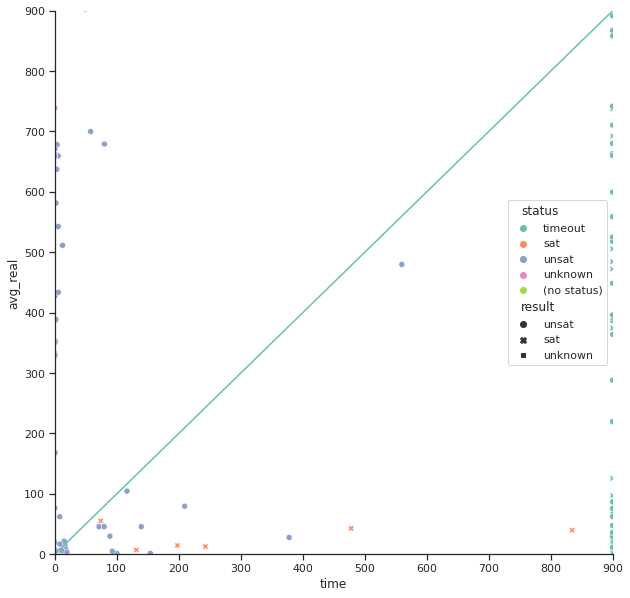

In [29]:
plt.xlim(0, timeout)
plt.ylim(0, timeout)
g = sns.scatterplot(x='time', y='avg_real', hue='status', style='result', data=m_bv)
sns.despine()
x = np.linspace(0, timeout, 2)
g.plot(x, x)

## Array

In [30]:
df_array: pd.DataFrame = df[df['index'].str.startswith('array-')]
df_array.head()

,index,SPACER_cex_depth,SPACER_cluster_out_of_gas,SPACER_conj,SPACER_conj_failed,SPACER_conj_success,SPACER_inductive_level,SPACER_max_depth,SPACER_max_query_lvl,SPACER_non_local_gen,...,time_spacer_init_rules_pt_init,time_spacer_mbp,time_spacer_solve,time_spacer_solve_propagate,time_spacer_solve_reach,time_spacer_solve_reach_children,time_spacer_solve_reach_cluster,time_spacer_solve_reach_gen_bool_ind,time_spacer_solve_reach_gen_global,time_spacer_solve_reach_is_reach
0,array-VexRiscv-regch0-15-p0.smt2,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,NaN,...,0.06,13.96,124.64,0.86,123.75,15.31,0.69,86.06,NaN,NaN
1,array-VexRiscv-regch0-15-p1.smt2,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,NaN,...,0.06,3.25,34.20,3.00,31.18,3.83,0.04,20.25,NaN,NaN
2,array-VexRiscv-regch0-20-p0.smt2,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,NaN,...,0.06,15.49,153.23,8.65,144.55,16.77,0.31,103.92,NaN,NaN
3,array-arbitrated_fifos_n2d8w8.smt2,NaN,21.0,2.0,2.0,NaN,NaN,20.0,19.0,2.0,...,0.00,33.13,638.42,195.09,443.25,29.43,7.32,290.13,4.88,1.59
4,array-array_swap.smt2,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,...,NaN,NaN,0.01,0.00,0.00,NaN,NaN,NaN,NaN,NaN


In [31]:
# quick overview of solved/unsolved instances
df_array[['status', 'index']].groupby('status').count()

,index
status,
(no status),5
timeout,90
unknown,32
unsat,188


In [32]:
df_array.query('status == "(no status)"')[['index', 'status']]

,index,status
92,array-dblclockfft_butterfly_ck3_r0-p051.smt2,(no status)
105,array-dblclockfft_butterfly_ck3_r1-p049.smt2,(no status)
135,array-marlann_compute_fail1-p0.smt2,(no status)
138,array-marlann_compute_fail2-p1.smt2,(no status)
139,array-marlann_compute_fail2-p2.smt2,(no status)


In [33]:
unknown_df_array: pd.DataFrame = unknown_df[unknown_df['index'].str.startswith('array-')]
unknown_df_array.head()

,index,status,error
0,array-VexRiscv-regch0-15-p0.smt2,unknown,"(error ""query failed: Argument #b11111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 32) (_ BitVec 32)) (_ BitVec 32))"")"
1,array-VexRiscv-regch0-15-p1.smt2,unknown,"(error ""query failed: Argument #b11111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 32) (_ BitVec 32)) (_ BitVec 32))"")"
2,array-VexRiscv-regch0-20-p0.smt2,unknown,"(error ""query failed: Argument #b00011 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 32) (_ BitVec 32)) (_ BitVec 32))"")"
4,array-array_swap.smt2,unknown,"(error ""query failed: Argument #b1111111111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 32) (_ BitVec 32)) (_ BitVec 32))"")"
10,array-dblclockfft_butterfly_ck1-p063.smt2,unknown,"(error ""query failed: rule validation failed when checking: (exists ((x!1 Bool)"


In [34]:
unknown_df.groupby('error')[['index']].agg(['first', 'count'])

index  \
                                                                                                                                                                                               first   
error                                                                                                                                                                                                  
(error "query failed: Argument #b00011 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 32) (_ BitVec 32)) (_ BitVec 32))")                   array-VexRiscv-regch0-20-p0.smt2   
(error "query failed: Argument #b11 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 20) (_ BitVec 20)) (_ BitVec 20))")                          array-zipcpu-zipmmu-p26.smt2   
(error "query failed: Argument #b11111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 32) (_ BitVec 32)) (_ BitVec 32))")                   array-VexRiscv-regch0-15-p0.smt2   
(error "query failed: Argument #b1111111111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 32) (_ BitVec 32)) (_ BitVec 32))")                         array-array_swap.smt2   
(error "query failed: operator is applied to arguments of the wrong sort")                                                                              array-dblclockfft_butterfly_ck3_r2-p042.smt2   
(error "query failed: rule validation failed when checking: (and (not false))")                                                                                           bv-picorv32-pcregs-p0.smt2   
(error "query failed: rule validation failed when checking: (exists ((x!1 Bool)                                                                            array-dblclockfft_butterfly_ck1-p063.smt2   

                                                                                                                                                              
                                                                                                                                                       count  
error                                                                                                                                                         
(error "query failed: Argument #b00011 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 32) (_ BitVec 32)) (_ BitVec 32))")          1  
(error "query failed: Argument #b11 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 20) (_ BitVec 20)) (_ BitVec 20))")             2  
(error "query failed: Argument #b11111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 32) (_ BitVec 32)) (_ BitVec 32))")          3  
(error "query failed: Argument #b1111111111 at position 1 does not match declaration (declare-fun bvadd ((_ BitVec 32) (_ BitVec 32)) (_ BitVec 32))")     2  
(error "query failed: operator is applied to arguments of the wrong sort")                                                                                 1  
(error "query failed: rule validation failed when checking: (and (not false))")                                                                            2  
(error "query failed: rule validation failed when checking: (exists ((x!1 Bool)                                                                           23

In [35]:
df_ratio_array: pd.DataFrame = df_ratio[df_ratio['index'].str.startswith('array-')]
df_ratio_array[(df_ratio_array['ratio'] < 0.5) & (df_ratio_array['time_spacer_solve'] > 10)]\
    [['index', 'time_pool_solver_smt_total', 'time_spacer_solve', 'ratio']]\
    .sort_values('ratio', ascending=True)

,index,time_pool_solver_smt_total,time_spacer_solve,ratio
11,array-dblclockfft_butterfly_ck1-p068.smt2,50.92,740.80,0.068737
17,array-dblclockfft_butterfly_ck1-p117.smt2,79.92,465.06,0.171849
43,array-dblclockfft_butterfly_ck1-p343.smt2,12.36,60.73,0.203524
34,array-dblclockfft_butterfly_ck1-p269.smt2,13.38,56.58,0.236479
45,array-dblclockfft_butterfly_ck1-p348.smt2,3.76,15.28,0.246073
21,array-dblclockfft_butterfly_ck1-p167.smt2,15.86,64.21,0.247002
51,array-dblclockfft_butterfly_ck1-p375.smt2,4.04,16.02,0.252185
14,array-dblclockfft_butterfly_ck1-p078.smt2,6.99,26.65,0.262289
58,array-dblclockfft_butterfly_ck1-p436.smt2,11.21,39.33,0.285024
57,array-dblclockfft_butterfly_ck1-p434.smt2,4.68,16.01,0.292317


In [36]:
df_max_expand_time_array: pd.DataFrame = df_max_expand_time[df_max_expand_time['index'].str.startswith('array-')]
df_max_expand_time_array[df_max_expand_time_array['max_expand_time'] > 5]\
    [['index', 'max_expand_time', 'max_expand_time_line_no']]\
    .sort_values('max_expand_time', ascending=False)

,index,max_expand_time,max_expand_time_line_no
151,array-picorv32_mutAY_mem-p8.smt2,414.41,11154
11,array-dblclockfft_butterfly_ck1-p068.smt2,280.71,12270
17,array-dblclockfft_butterfly_ck1-p117.smt2,237.35,10253
118,array-dblclockfft_butterfly_ck3_r2-p029.smt2,145.65,2632
179,array-zipcpu_zipcpu_dcache-p028.smt2,78.58,14275
193,array-zipcpu_zipcpu_dcache-p138.smt2,73.60,10489
23,array-dblclockfft_butterfly_ck1-p191.smt2,60.14,9194
114,array-dblclockfft_butterfly_ck3_r1-p159.smt2,57.38,6931
232,array-zipcpu_zipcpu_dcache-p550.smt2,53.35,15981
80,array-dblclockfft_butterfly_ck2_r0-p173.smt2,52.99,6924


In [37]:
hwmcc20_results_array: pd.DataFrame = hwmcc20_results[hwmcc20_results['index'].str.startswith('array-')]
hwmcc20_results_array.head()

,index,result,sat_count,uns_count,unk_count,low_bound,high_bound,avg_bound,low_real,high_real,avg_real,low_time,high_timeavg_time,low_mem,high_mem,avg_mem,avg_time,high_time
0,array-VexRiscv-regch0-15-p0.smt2,unsat,0,5,0,-1,-1,-1.0,9.40,2857.39,586.858,9.30,NaN,82.0,2633.0,1112.0,1779.746,8570.64
1,array-VexRiscv-regch0-15-p1.smt2,unsat,0,5,0,-1,-1,-1.0,9.59,3105.02,641.160,9.46,NaN,79.0,4350.0,1388.4,1355.362,6296.49
2,array-VexRiscv-regch0-20-p0.smt2,unsat,0,4,0,-1,-1,-1.0,228.44,3600.10,1017.224,228.36,NaN,209.0,10376.0,3061.4,3822.140,8203.90
3,array-arbitrated_fifos_n2d8w8.smt2,unknown,0,0,2,-1,-1,-1.0,0.74,3600.10,2874.864,1.46,NaN,82.0,4803.0,1544.2,10024.040,28426.36
4,array-array_swap.smt2,unknown,0,0,2,-1,-1,-1.0,0.42,3600.10,2875.386,0.09,NaN,31.0,24699.0,9013.2,13639.468,46507.75


In [38]:
m_array: pd.DataFrame = pd.merge(df_array, hwmcc20_results_array, on='index')
m_array.head()

,index,SPACER_cex_depth,SPACER_cluster_out_of_gas,SPACER_conj,SPACER_conj_failed,SPACER_conj_success,SPACER_inductive_level,SPACER_max_depth,SPACER_max_query_lvl,SPACER_non_local_gen,...,low_real,high_real,avg_real,low_time,high_timeavg_time,low_mem,high_mem,avg_mem,avg_time,high_time
0,array-VexRiscv-regch0-15-p0.smt2,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,NaN,...,9.40,2857.39,586.858,9.30,NaN,82.0,2633.0,1112.0,1779.746,8570.64
1,array-VexRiscv-regch0-15-p1.smt2,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,NaN,...,9.59,3105.02,641.160,9.46,NaN,79.0,4350.0,1388.4,1355.362,6296.49
2,array-VexRiscv-regch0-20-p0.smt2,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,NaN,...,228.44,3600.10,1017.224,228.36,NaN,209.0,10376.0,3061.4,3822.140,8203.90
3,array-arbitrated_fifos_n2d8w8.smt2,NaN,21.0,2.0,2.0,NaN,NaN,20.0,19.0,2.0,...,0.74,3600.10,2874.864,1.46,NaN,82.0,4803.0,1544.2,10024.040,28426.36
4,array-array_swap.smt2,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,...,0.42,3600.10,2875.386,0.09,NaN,31.0,24699.0,9013.2,13639.468,46507.75


In [39]:
m_array[['status', 'index', 'result']].groupby(['status', 'result']).count()

index
status      result        
(no status) sat          3
            unsat        2
timeout     sat         16
            unknown     20
            unsat       54
unknown     unknown      1
            unsat       31
unsat       unknown      1
            unsat      187

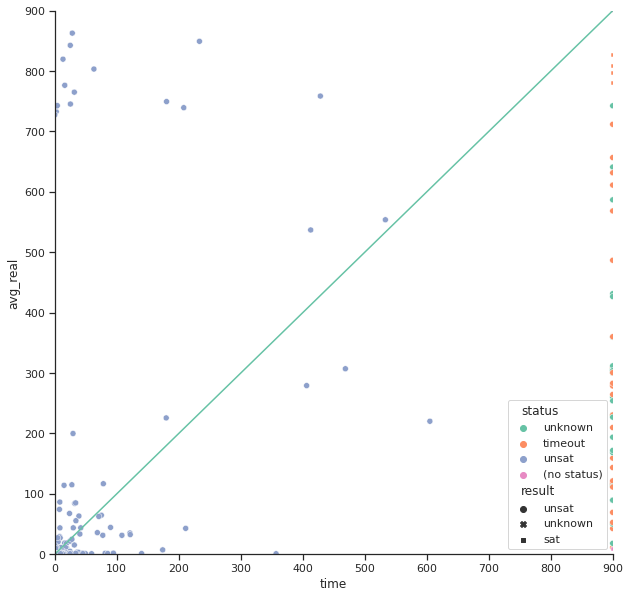

In [40]:
plt.xlim(0, timeout)
plt.ylim(0, timeout)
g = sns.scatterplot(x='time', y='avg_real', hue='status', style='result', data=m_array)
sns.despine()
x = np.linspace(0, timeout, 2)
g.plot(x, x)